# ***TITANIC SURVIVAL PREDICTION***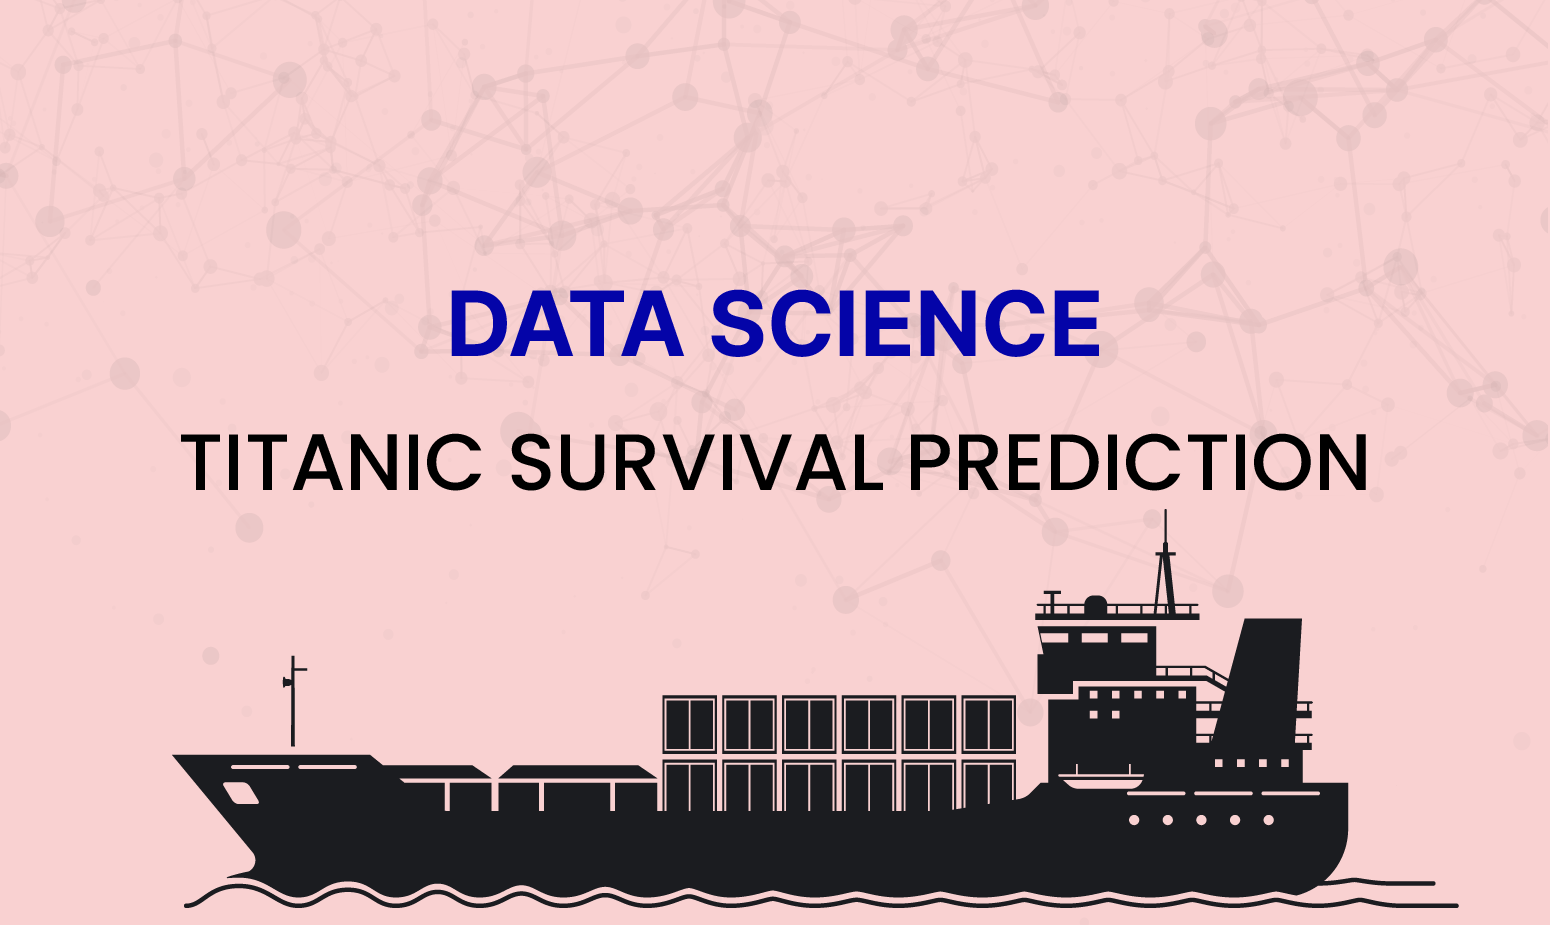

**Importing Necessary libraries**

In [10]:
#Basic python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Importing the required file
train_df = pd.read_csv("Titanic-Dataset.csv")

In [12]:
train_df.shape

(891, 12)

In [13]:
#To know the columns about the dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#Describe the function about the dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#To find the how many null values in the dataset
#That are displayed in column names
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

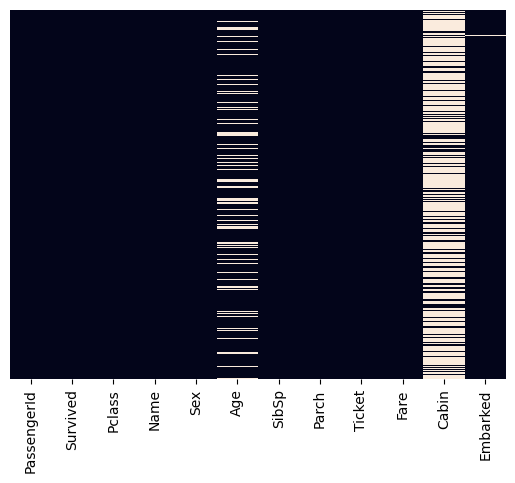

In [17]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, color='red')

In [18]:
train_df = train_df.drop(columns='Cabin', axis=0)

In [19]:
#Replacing missing column using mean values
mean_value = train_df['Age'].mean()
train_df['Age'].fillna(value = mean_value, inplace=True)
print("Replaced")

Replaced


In [20]:
train_df=train_df.dropna(subset=['Embarked'] , inplace=False)
print("Removed")

Removed


In [21]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: >

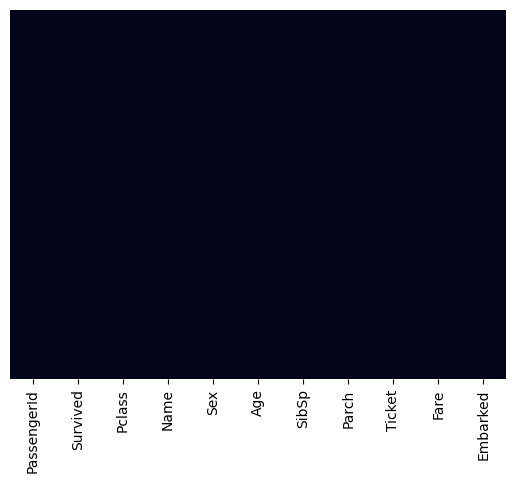

In [22]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [23]:
train_df.to_csv("Titanic-cleaning dataset.csv")

In [24]:
train_df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

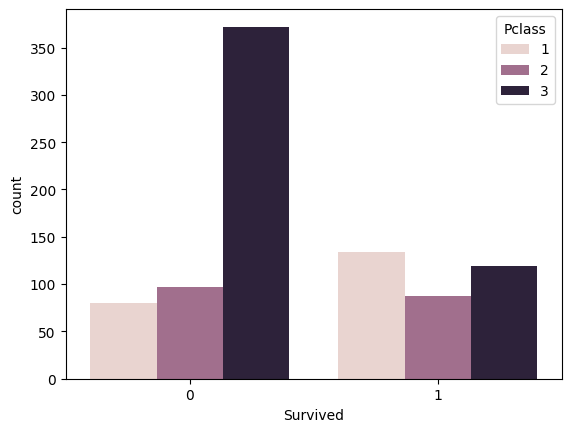

In [25]:
sns.countplot(x=train_df['Survived'], hue=train_df['Pclass'])

In [26]:
train_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

<ipython-input-27-74592ddfb5be>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(x=train_df['Survived'] ,hue=train_df['Sex'] , color='purple')


<Axes: xlabel='Survived', ylabel='count'>

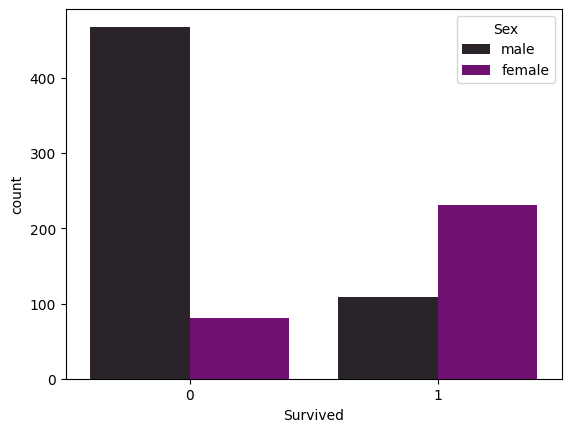

In [27]:
sns.countplot(x=train_df['Survived'] ,hue=train_df['Sex'] , color='purple')

In [28]:
train_df.replace({'Sex':{'male':'0','female':'1'},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [30]:
train_df['Sex'],train_df['Survived']

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    1
 889    0
 890    0
 Name: Sex, Length: 889, dtype: object,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

<ipython-input-31-e70838d1e1ef>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(x=train_df['Sex'], hue=train_df['Survived'], color='purple')


<Axes: xlabel='Sex', ylabel='count'>

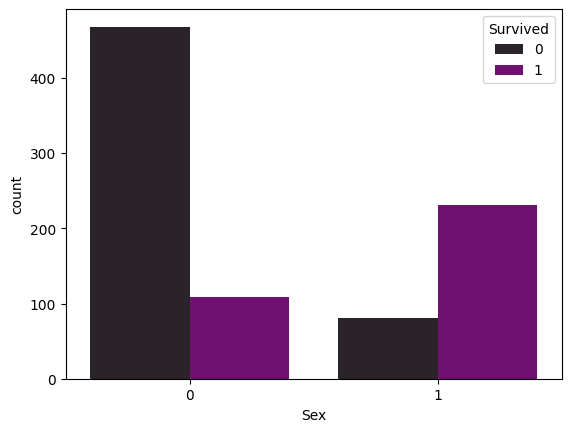

In [31]:
sns.countplot(x=train_df['Sex'], hue=train_df['Survived'], color='purple')

# **Model Training**

In [32]:
X = train_df[['Pclass' , 'Sex']]
Y = train_df[['Survived']]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Model prediction**

In [35]:
pre = print(model.predict(X_test))

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]


In [36]:
print(Y_test)

     Survived
560         0
37          0
615         1
170         0
69          0
..        ...
377         0
90          0
81          1
592         0
870         0

[178 rows x 1 columns]


# **Checking the Accuracy of the dataset**

In [37]:
from sklearn.metrics import accuracy_score

## To find the accuracy of training data

In [38]:
X_train_prediction=model.predict(X_train)
ap_train=accuracy_score(Y_train,X_train_prediction)
print("Accuracy of training data: ",ap_train)

Accuracy of training data:  0.7819971870604782


## To find Accuracy of testing data

In [39]:
X_test_prediction=model.predict(X_test)
ap_test=accuracy_score(Y_test,X_test_prediction)
print("Accuracy of testing data: ",ap_test)

Accuracy of testing data:  0.8033707865168539


In [40]:
import warnings
warnings.filterwarnings("ignore")

res = model.predict([[1,0]])

if(res==0):
  print("Not Survived")
else:
  print("Survived")

Not Survived
